# Part I : Exploratory Analysis

In [1]:
%matplotlib inline

import pandas as pd
import statsmodels.api as sm
import re
import numpy as np


In [2]:
r = pd.read_csv( 'ratings.csv' )
tr = pd.read_csv( 'to_read.csv' )
b = pd.read_csv( 'books.csv' )

t = pd.read_csv( 'tags.csv' )
bt = pd.read_csv( 'book_tags.csv')


### Ratings

In [2]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings are sorted chronologically, oldest first.

In [3]:
len(r)

5976479

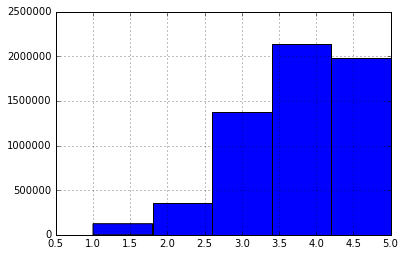

In [4]:
r.rating.hist( bins = 5 )

### Number of ratings by user

In [5]:
unique_user = (r.groupby('user_id').agg({'book_id':'count', 'rating': 'mean'}).reset_index().rename(columns={'book_id':'No of ratings', 'rating': 'mean_rating'})

)

In [88]:
unique_user.sort_values(['No of ratings'], ascending=[False]).head()

,user_id,mean_rating,No of ratings
30943,30944,4.210000,200
12873,12874,3.450000,200
52035,52036,3.442211,199
12380,12381,3.427136,199
28157,28158,3.939698,199


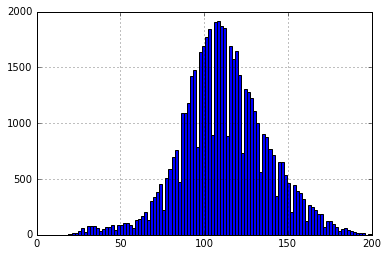

In [7]:
unique_user['No of ratings'].hist(bins = 100)

### Distribution of mean user ratings

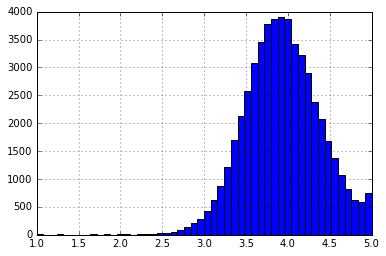

In [8]:
unique_user['mean_rating'].hist(bins = 50)

### Number of ratings per book

In [9]:
unique_books = (r.groupby('book_id').agg({'user_id':'count', 'rating': 'mean'}).reset_index().rename(columns={'user_id':'No of ratings', 'rating': 'mean_rating'})

)

In [10]:
unique_books.sort_values(['No of ratings'], ascending=[False]).head()

,book_id,mean_rating,No of ratings
0,1,4.279707,22806
1,2,4.351350,21850
3,4,4.329369,19088
2,3,3.214341,16931
4,5,3.772224,16604


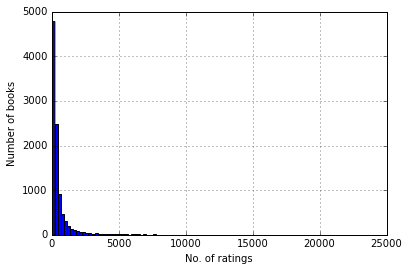

In [11]:
import pylab as pl
unique_books['No of ratings'].hist(bins = 100)
pl.xlabel("No. of ratings")
pl.ylabel("Number of books")

### Distribution of mean book ratings

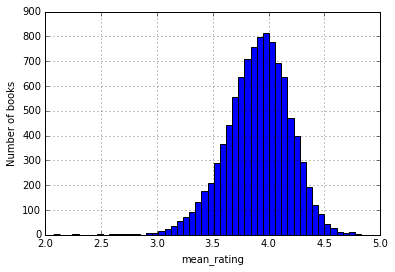

In [12]:
unique_books['mean_rating'].hist(bins = 50)
pl.xlabel("mean_rating")
pl.ylabel("Number of books")

It appears that 4 is the most popular rating. There are relatively few ones and twos.

### To read
These are the books users marked "to read".


In [13]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [14]:
len(tr)

912705

Most books have been marked to read by somebody. Majority of the users have some books marked to read.

In [15]:
len(tr.book_id.unique())

9986

In [16]:
len(tr.user_id.unique())

48871

### Books

In [17]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [18]:
b.columns

Index([u'book_id', u'goodreads_book_id', u'best_book_id', u'work_id',
       u'books_count', u'isbn', u'isbn13', u'authors',
       u'original_publication_year', u'original_title', u'title',
       u'language_code', u'average_rating', u'ratings_count',
       u'work_ratings_count', u'work_text_reviews_count', u'ratings_1',
       u'ratings_2', u'ratings_3', u'ratings_4', u'ratings_5', u'image_url',
       u'small_image_url'],
      dtype='object')

Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [19]:
len(b)

10000

### User and book IDs

In [20]:
r.user_id.max()

53424

In [21]:
r.book_id.max()

10000

The IDs are contiguous.

In [22]:
assert( len( r.user_id.unique()) == r.user_id.max())
assert( len( r.book_id.unique()) == r.book_id.max())

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [23]:
reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [24]:
reviews_per_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9479    48
9260    48
9705    50
Name: book_id, dtype: int64

### Reviews per user

All users have at least 19 reviews.

In [25]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [26]:
reviews_per_user.sort_values().head( 10 )

user_id
34590    19
43675    20
40753    21
51725    21
32128    21
37640    22
16470    22
42736    22
48077    22
40299    22
Name: user_id, dtype: int64

### Tags

In [27]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [28]:
len(t)

34252

In [29]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Tag applications are sorted by goodreads_book_id ASC and by count DESC.

In [30]:
len(bt)

999912

Let us merge tag names into tag applications.

In [31]:
bt = bt.merge( t, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [32]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

It appears that there are some negative tag counts. Let's fix this.

In [33]:
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [34]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Sample some popular book tags.

In [35]:
bt.sample( 10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
780794,10960383,30574,22050,to-read,A Grown-Up Kind of Pretty
504994,420278,30574,11570,to-read,The Complete Poems 1927-1979
996812,30364931,30574,9808,to-read,Neighbor Dearest
173800,25307,30574,29047,to-read,"No god but God: The Origins, Evolution and Fut..."
169200,24770,30574,58046,to-read,"Uglies (Uglies, #1)"
762994,9969571,30574,244228,to-read,Ready Player One
263000,51737,30574,111676,to-read,The Truth About Forever
937656,20727654,30574,42218,to-read,The Paper Magician (The Paper Magician Trilogy...
854387,15796700,1774,147,african-literature,Americanah
642094,4634266,30574,4633,to-read,NARUTO -ナルト- 巻ノ四十三


These are the most popular tags:

In [36]:
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64

In [37]:
bt.head()

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...


### Distribution of Genres

In [38]:
relevant_genres = ["Art", "Biography", "Business", 
                   "Chick Lit", "Children's", "Christian", 
                   "Classics", "Comics", "Contemporary", 
                   "Cookbooks", "Crime", "Ebooks", "Fantasy", 
                   "Fiction", "Gay and Lesbian", "Graphic Novels", 
                   "Historical Fiction", "History", "Horror", 
                   "Humor and Comedy", "Manga", "Memoir", "Music", 
                   "Mystery", "Nonfiction", "Paranormal", "Philosophy", 
                   "Poetry", "Psychology", "Religion", "Romance", "Science", 
                   "Science Fiction", "Self Help", "Suspense", "Spirituality", 
                   "Sports", "Thriller", "Travel", "Young Adult"]

In [39]:
lowered_genres = map(lambda x: x.lower(), relevant_genres)

In [40]:
genre_book_list = bt[bt['tag_name'].isin(lowered_genres)]

In [41]:
genre_book_list.head()

,goodreads_book_id,tag_id,count,tag_name,title
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
5,1,11743,9954,fiction,Harry Potter and the Half-Blood Prince (Harry ...
25,1,7457,958,classics,Harry Potter and the Half-Blood Prince (Harry ...
38,1,22973,673,paranormal,Harry Potter and the Half-Blood Prince (Harry ...
52,1,20939,465,mystery,Harry Potter and the Half-Blood Prince (Harry ...


In [42]:
grouped_genres = genre_book_list.groupby('tag_name').agg({'goodreads_book_id':'count'}).reset_index().rename(columns={'goodreads_book_id':'tag_count_percentage'})

In [43]:
grouped_genres.head()

,tag_name,tag_count_percentage
0,art,436
1,biography,1109
2,business,377
3,christian,357
4,classics,2785


In [44]:
total_books = bt.count()

In [45]:
grouped_genres_new = grouped_genres

In [46]:
from __future__ import division
grouped_genres_new.tag_count_percentage = grouped_genres.tag_count_percentage.apply( lambda x: x*100/float(total_books['count']))

In [47]:
grouped_genres_new = grouped_genres_new.sort_values(['tag_count_percentage'], ascending=[False])

In [48]:
grouped_genres_new_new_index = grouped_genres_new
grouped_genres_new_new_index.set_index(["tag_name"],inplace=True)

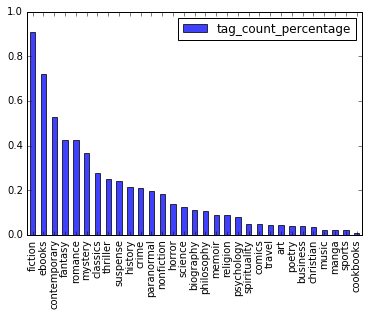

In [49]:
#ax = grouped_genres_new['tag_count_percentage'].plot(kind='bar')
#ax.set_xlabel(grouped_genres_new.tag_name, fontsize=12)
import matplotlib.pyplot as plt    
#
grouped_genres_new_new_index.plot(kind='bar',alpha=0.75, rot=90)
plt.xlabel("")
plt.show()

In [50]:
b.language_code.head()

0      eng
1      eng
2    en-US
3      eng
4      eng
Name: language_code, dtype: object

In [51]:
books_grouped_by_languague = b.groupby('language_code').agg({'book_id' : 'count'}).reset_index().rename(columns={'book_id':'book_count'})

In [53]:
books_grouped_by_languague.head()

,language_code,book_count
0,ara,64
1,dan,3
2,en,4
3,en-CA,58
4,en-GB,257


In [54]:
books_grouped_by_languague = books_grouped_by_languague.sort_values(['book_count'], ascending=[False])


In [55]:
books_grouped_by_languague.set_index(["language_code"],inplace=True)

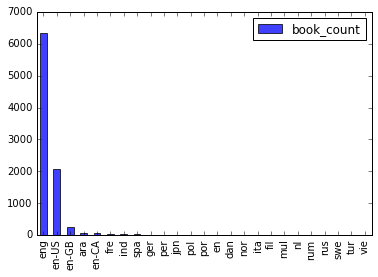

In [56]:
#ax = books_grouped_by_languague['book_count'].plot(kind='bar')
#ax.set_xlabel(books_grouped_by_languague.language_code, fontsize=12)
books_grouped_by_languague.plot(kind='bar',alpha=0.75, rot=90)
plt.xlabel("")
plt.show()

In [57]:
books_grouped_by_languague = books_grouped_by_languague.reset_index()

### excluding english

In [58]:
english_list = ["en-US", "en-GB", "eng", "en-CA", ""]

In [59]:
non_english_book_list = books_grouped_by_languague[~books_grouped_by_languague.language_code.isin(english_list)]

In [60]:
non_english_book_list.sort_values(['book_count'], ascending=[False])

,language_code,book_count
3,ara,64
5,fre,25
6,ind,21
7,spa,20
8,ger,13
9,per,7
10,jpn,7
11,pol,6
12,por,6
13,en,4


In [61]:
non_english_book_list.set_index(["language_code"],inplace=True)

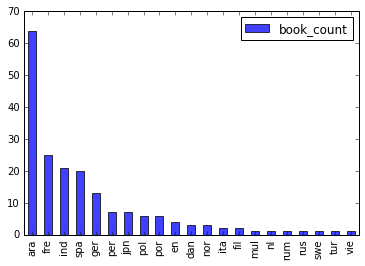

In [62]:
non_english_book_list.plot(kind='bar',alpha=0.75, rot=90)
plt.xlabel("")
plt.show()

In [63]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [64]:
books_relevant_col = b[['title', 'ratings_count', 'average_rating']]

### Top 10 rated books

In [65]:
books_relevant_col.sort_values(['average_rating'], ascending=[False]).head(10)

,title,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,28900,4.82
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77
861,"Words of Radiance (The Stormlight Archive, #2)",73572,4.77
8853,Mark of the Lion Trilogy,9081,4.76
7946,ESV Study Bible,8953,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,22351,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,16766,4.74
421,"Harry Potter Boxset (Harry Potter, #1-7)",190050,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",24618,4.73
6919,The Indispensable Calvin and Hobbes,14597,4.73


### Top 10 popular books

In [66]:
books_relevant_col.sort_values(['ratings_count'], ascending=[False]).head(10)

,title,ratings_count,average_rating
0,"The Hunger Games (The Hunger Games, #1)",4780653,4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44
2,"Twilight (Twilight, #1)",3866839,3.57
3,To Kill a Mockingbird,3198671,4.25
4,The Great Gatsby,2683664,3.89
5,The Fault in Our Stars,2346404,4.26
6,The Hobbit,2071616,4.25
7,The Catcher in the Rye,2044241,3.79
9,Pride and Prejudice,2035490,4.24
8,"Angels & Demons (Robert Langdon, #1)",2001311,3.85


### What influences a book’s rating?

In [67]:
vectors = ["books_count","original_publication_year","ratings_count", "work_ratings_count", "work_text_reviews_count", "average_rating"]

In [68]:
vector_df = b[vectors]

In [69]:
correlation_matric = vector_df.corr()

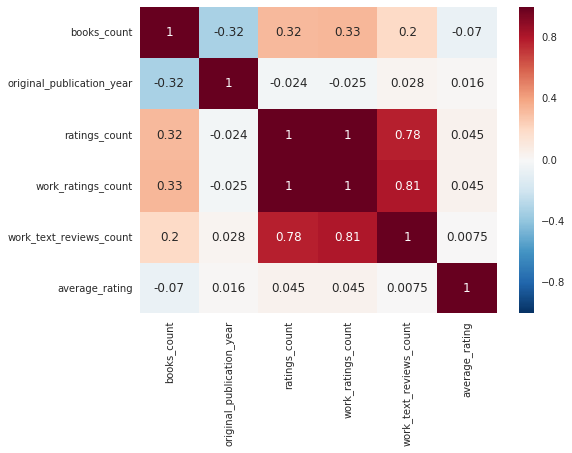

In [70]:
import seaborn as sns; sns.set()
sns.heatmap(correlation_matric, annot=True)

### Is there a relationship between the number of ratings and the average rating?

The correlation is 0.0450


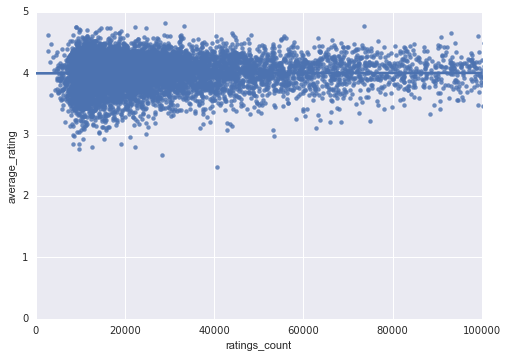

In [199]:
sns.regplot(books_relevant_col['ratings_count'],books_relevant_col['average_rating'])
plt.ylim(0,5)
plt.xlim(0,100000)
correlation = books_relevant_col['average_rating'].corr(books_relevant_col['ratings_count'])
print "The correlation is " + str("%.4f" % correlation)

### Multiple editions of each book

The correlation is -0.0699


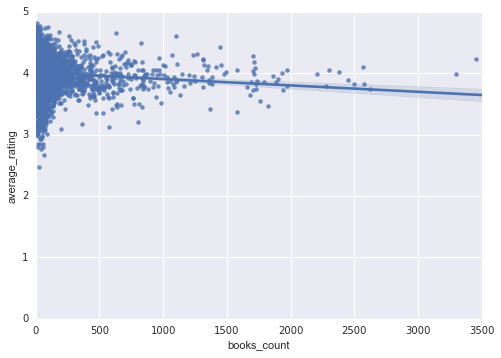

In [200]:
sns.regplot(b['books_count'],b['average_rating'])
plt.ylim(0,5)
plt.xlim(0,3500)
corr = b['books_count'].corr(b['average_rating'])
print "The correlation is " + str("%.4f" % corr)

### Do frequent raters rate differently?

In [91]:
user_less_than_100_ratings = unique_user[unique_user['No of ratings'] <= 100]

The correlation is 0.0151


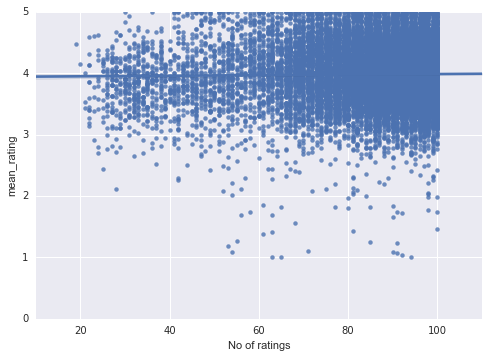

In [201]:
sns.regplot(user_less_than_100_ratings['No of ratings'],user_less_than_100_ratings['mean_rating'])
plt.ylim(0,5)
#plt.xlim(0,3500)
corr = user_less_than_100_ratings['No of ratings'].corr(user_less_than_100_ratings['mean_rating'])
print "The correlation is " + str("%.4f" % corr)

### Series of books

In [3]:
#making a copy of book data frame
book_copy = b.copy()

In [220]:
book_copy['title'] = book_copy['title'].str.lower()
book_copy['original_title'] = book_copy['original_title'].str.lower()

In [223]:
#book_copy['original_title_in_title'] = [(str(x[1]) in x[0]) for x in zip(book_copy['original_title'], book_copy['title'])]
book_copy['part_of_series'] = book_copy['title'].str.contains("#[0-9]+\\)$")
series_books = book_copy[book_copy['part_of_series']]

In [316]:
series_books['clean_names'] = [re.sub('[^a-zA-Z0-9-_*.]', '', x.split('(')[-1].split('#')[0]) for x in series_books['title'] ]
series_books['series_number'] = [re.sub('[^a-zA-Z0-9-_*.]', '', x.split('(')[-1].split('#')[1]) for x in series_books['title'] ]

/Users/krylov/Desktop/Stash/Machine_learning_python/Machine_learning/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/krylov/Desktop/Stash/Machine_learning_python/Machine_learning/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [306]:
series_books_rating = series_books.groupby('clean_names').agg({'book_id' : 'count', 'average_rating': 'mean'}).reset_index().rename(columns={'book_id':'book_count', 'average_rating': 'mean_rating'})

The correlation is 0.1704


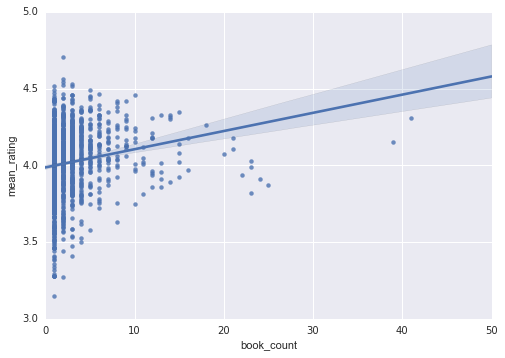

In [308]:
sns.regplot(series_books_rating['book_count'],series_books_rating['mean_rating'])
plt.ylim(3,5)
plt.xlim(0,50)
corr = series_books_rating['book_count'].corr(series_books_rating['mean_rating'])
print "The correlation is " + str("%.4f" % corr)

### Is the sequel better than the original?

In [319]:
series_books['series_number'] = [(re.findall('\d+', x))[0] for x in series_books['series_number'] ]
series_books['series_number'] = series_books[['series_number']].astype(int)

/Users/krylov/Desktop/Stash/Machine_learning_python/Machine_learning/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/krylov/Desktop/Stash/Machine_learning_python/Machine_learning/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [336]:
sequels_analysis = series_books[(3 > series_books['series_number']) & (series_books['series_number'] > 0) ]

In [338]:
sequels_analysis = sequels_analysis[['average_rating', 'series_number']]

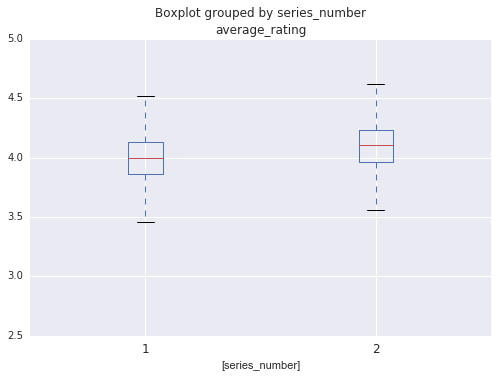

In [339]:
sequels_analysis.boxplot(by='series_number')

### How long should a title be?

In [346]:
book_copy['clean_titles'] = [re.sub('[^a-zA-Z0-9]', '', x.split('(')[-1].split('#')[0]) for x in book_copy['title'] ]
book_copy['clean_title_length'] = [len(x) for x in book_copy['clean_titles']]

In [349]:
#taking a subset with title length < 20
title_analysis = book_copy[book_copy['clean_title_length'] < 20]

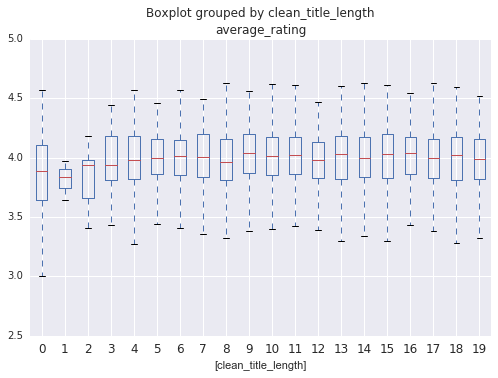

In [350]:
title_analysis[['clean_title_length', 'average_rating']].boxplot(by='clean_title_length')

### Does having a subtitle improve the book’s rating?

In [352]:
book_copy['sub_title_present'] = book_copy['title'].str.contains(':')

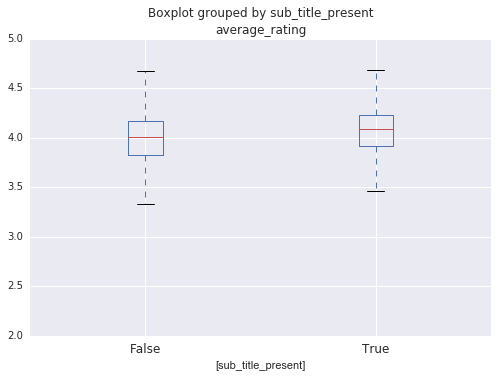

In [353]:
book_copy[['average_rating', 'sub_title_present']].boxplot(by='sub_title_present')

### Does the number of authors matter?

In [357]:
book_copy['number_of_authors'] = [len(x.split(',')) for x in book_copy['authors']]

The correlation is 0.0745


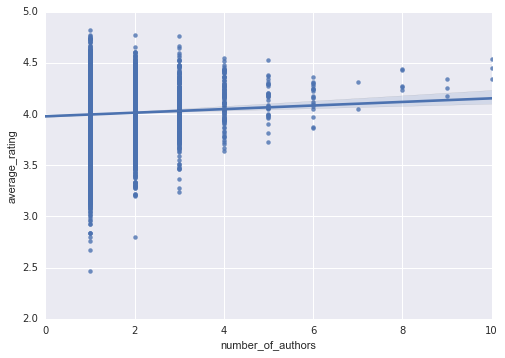

In [359]:
sns.regplot(book_copy['number_of_authors'],book_copy['average_rating'])
plt.ylim(2,5)
plt.xlim(0,10)
corr = book_copy['number_of_authors'].corr(book_copy['average_rating'])
print "The correlation is " + str("%.4f" % corr)

# Part II: Collaborative Filtering

In [3]:
bookDF=b.copy()

In [4]:
bookDF.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [6]:
unique_user = (r.groupby('user_id').agg({'book_id':'count', 'rating': 'mean'}).reset_index().rename(columns={'book_id':'No of ratings', 'rating': 'mean_rating'}))

#### dropping users with less than 150 ratings as more number of users will help in this section and it will decrease the data set

In [7]:
relevant_users = unique_user[unique_user['No of ratings'] > 150]
ratingsDF = r[r['user_id'].isin(relevant_users['user_id'])]

#### using cosine similarity

Data normalisation : We first build a list of dictionary. Each dictionary corresponds to a single book. The user_id is the key, while rating given by the user for the book is its value.

In [93]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0;
testdf = ratingsDF
testdf=testdf[['user_id','rating']].groupby(testdf['book_id'])
for groupKey in testdf.groups.keys():
    tempDict={}
    #this takes some time so uncomment the line and see the book ids print to check if its working or not
    #print "======================" + str(groupKey)

    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]]=groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

Using sklearn's DictVectorizer() function to create vectors corresponding to each book. Create a vector space with users as column vectors. Each point in the vector space represents a book. Rating of the book given an user is its magnitude and then calculate similarity/distance between books in this vector space.

In [94]:
from sklearn.feature_extraction import DictVectorizer
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)

use sklearn's consine_similarity function to calculate pairwise similarity matrix

In [95]:
from sklearn.metrics.pairwise import cosine_similarity
pairwiseSimilarity = cosine_similarity(vector)

At last defined a function that takes an input id and outputs 5 top most recommendations. Please note that this id is the column id in book.csv. Values of id are in [1,10000]

In [96]:
def printBookDetails(bookID):
    print("Title:", bookDF[bookDF['book_id']==bookID]['original_title'].values[0])
    print("Author:",bookDF[bookDF['book_id']==bookID]['authors'].values[0])
    print("Printing Book-ID:",bookID)
    print ("=")*25


def getTopRecommandations(bookID):
    row = reverseIndexMap[bookID]
    print("-")*5 + "Input BOOK" + ("-")*5
    printBookDetails(bookID)
    print("-")*5 + "Recommended BOOK" + ("-")*5
    
    ## sorting and getting the index of elements then leaving the last one as it will 
    ##the same book itself and reversing the array in desecnding values
    similarBookIDs = [printBookDetails(indexMap[i]) for i in np.argsort(pairwiseSimilarity[row])[-6:-1][::-1]]

In [97]:
getTopRecommandations(1245)

-----Input BOOK-----
('Title:', 'The Brethren')
('Author:', 'John Grisham')
('Printing Book-ID:', 1245)
-----Recommended BOOK-----
('Title:', 'The Testament')
('Author:', 'John Grisham')
('Printing Book-ID:', 1057)
('Title:', 'The Partner')
('Author:', 'John Grisham')
('Printing Book-ID:', 963)
('Title:', 'The Chamber')
('Author:', 'John Grisham')
('Printing Book-ID:', 833)
('Title:', 'The Street Lawyer')
('Author:', 'John Grisham')
('Printing Book-ID:', 1037)
('Title:', 'The Summons')
('Author:', 'John Grisham')
('Printing Book-ID:', 1733)


### Using pearson correlation

In [48]:
books_dataset = pd.DataFrame(bookDF, columns=['book_id', 'authors', 'title', 'average_rating'])
books_dataset = books_dataset.sort_values('book_id')
books_dataset['title'] = books_dataset['title'].str.lower()

In [49]:
books_data = pd.merge(books_dataset, ratingsDF, on='book_id')

get rating of every user for every book

In [50]:
each_book_rating = pd.pivot_table(books_data, index='user_id', values='rating', columns='title', fill_value=0)

get correlation score of each book transpose is used to get correlation of every book not users

In [51]:
book_corr = np.corrcoef(each_book_rating.T)

get sorted list of book for correlation indexing

In [83]:
book_list=  list(each_book_rating)
book_titles =[] 
for i in range(len(book_list)):
    book_titles.append(book_list[i])

In [87]:
def get_recommendation(book_name):
    book_name = book_name.lower()
    book_similarities = np.zeros(book_corr.shape[0])
    #books_list = [(lambda x: x.lower())(x) for x in books_list] 
    book_index = book_titles.index(book_name)
    book_similarities += book_corr[book_index] 
    book_preferences = []
    for i in range(len(book_titles)):
        book_preferences.append((book_titles[i],book_similarities[i]))
    return sorted(book_preferences, key= lambda x: x[1], reverse=True)

In [91]:
def get_recommended_books(enter_book_id):
    book_name = bookDF[bookDF['book_id']==enter_book_id]['original_title'].values[0]
    book_recommendations = get_recommendation(book_name)
    print('The books you should like')
    print('-'*25)
    i=0
    cnt=0
    while cnt < 5:
        book_to_read = book_recommendations[i][0]
        i += 1
        if book_to_read in [(lambda x: x.lower())(x) for x in enter_book_list]:
            continue
        else:
            print(book_to_read)
            cnt += 1
    

In [92]:
get_recommended_books(1245)

The books you should like
-------------------------
the testament
the partner
the chamber
the street lawyer
the summons
